In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Основные понятия статистики



Возьмем данные о фильмах с контентом на английском языке. 

In [0]:
url="http://yustiks.ru/dataset/FilmTV_dataset.csv"
df=pd.read_csv(url)

*   **filmtv_ID** FilmTV ID
*   **film_title** Movie Title
*   **year** Year of Release
*   **genre** Movie Genre
*   **duration** Movie Duration
*   **country** Movie Country
*   **director** Movie Director
*   **actors** Movie Actors
*   **avg_vote** Movie Average Vote
*   **votes** Movie Number of Votes


Посмотрим основные колонки из таблицы

In [3]:
df.head()

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12


# Медиана

Возьмем колонку Duration - продолжительность фильма - и посчитаем медиану. **Медиана** - это такое значение, что ровно половина выборки больше него, а ровно половина - больше. 

In [12]:
# Извлекаем duration 
duration = df['duration']

# Находим их количество
num_duration = len(duration)

# Сортируем в порядке возрастания
sorted_duration = sorted(duration)

# Ищем индекс среднего элемента
middle = (num_duration // 2)

# Находим медиану
print(sorted_duration[middle])

95


In [13]:
import statistics
statistics.median(df['duration'])

95

# Среднее значение

In [6]:
sum(df['duration'])/len(df['duration'])

99.23111689086916

# Мода

мода - значение, которое наиболее часто встречается в выборке

In [16]:
# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
duration_counts = {}
for p in duration:
    if p not in duration_counts:
        duration_counts[p] = 1
    else:
        duration_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
maxp = 0
mode_duration = None
for k, v in duration_counts.items():
    if maxp < v:
        maxp = v
        mode_duration = k
print(mode_duration, maxp)


90 5511


In [14]:
statistics.mode(duration)

90

# Минимум и максимум

In [17]:
min(duration)

40

In [18]:
max(duration)

5280

# Выбросы

**Выбросы** - отсутствующих значений в данной колонке нет

In [21]:
duration.isnull().sum()

0

но зато есть отсутствующие значения в колонке actors

In [23]:
df['actors'].isnull().sum()

129

# Стандартное отклонение

Мера разброса данных (насколько данные варьируются от среднего значения) - корень среднего квадратный отклонения.

In [74]:
statistics.pstdev(duration)

34.95860443683266

In [75]:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(duration))

34.9589770801773


# Дисперсия

Дисперсия - квадрат стандартного отклонения

In [30]:
statistics.pvariance(duration)

1222.1040241709359

# Размах

In [26]:
duration_range = max(duration) - min(duration)
print(duration_range)

5240


# Коррелляция

Взаимосвязь двух выборок друг от друга. Чтобы графически увидеть взаимосвязь двух переменных, необходимо построить точечный график зависимости друг от друга. Например, возьмер 2 параметра - duration и votes. Зависит ли средняя оценка фильма от того, насколько долго он идет?

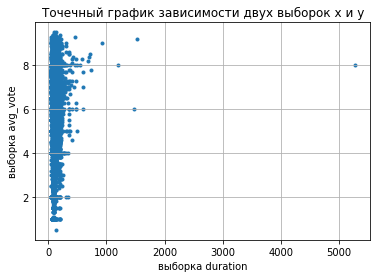

In [73]:
duration = df['duration']
avg_vote = df['avg_vote']
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

По данному графику можно заметить, что чем короткие фильмы имеют разные оценки - как низкие, так и высокие. Фильмы средней и большой длины имеют тенденция получать высокие оценки. Таким образом, между двумя выборками мы можем увидеть сильную коррелляцию.

# Нормальное распределение

**Посмотрим как выглядит нормальное распределение на практике**. Возьмем табличное значение avg_vote - среднее значение проголосовавших за данный фильм. Посмотрим график распределения данной величины.

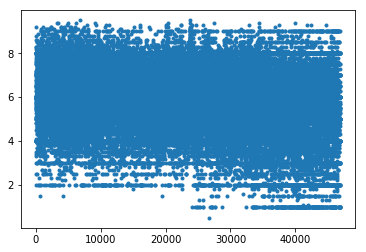

In [38]:
len_column = len(df['avg_vote']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
plt.scatter(x, df['avg_vote'], marker='.')

По такому графику сложно понять, какое это распределение. Построим частотный график значений. 

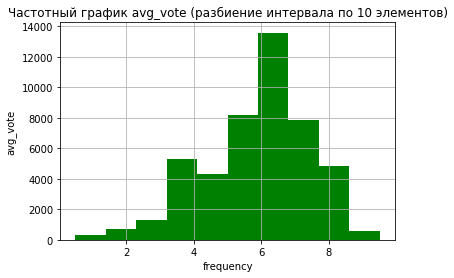

In [50]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['avg_vote'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график avg_vote (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Частотный график схож с нормальным распределением с некоторыми отклонениями. Мы можем поменять количество разбиений наших значений с 10 на 100:

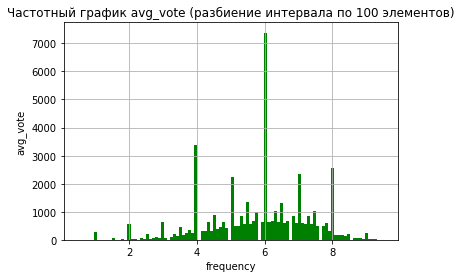

In [51]:
n, bins, patches = plt.hist(df['avg_vote'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график avg_vote (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Можно заметить, что у фильмов больше всего оценок 6 (всего таких фильмов со средней оценкой 6 более 7000)

**Зададим нормальное распределение теоритически.**

Зададим 2 выборки с нормальным распределением и построим точечный график зависимости двух переменных друг от друга.
Параметр ```loc``` задаёт $\mu$ или среднее значение, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.


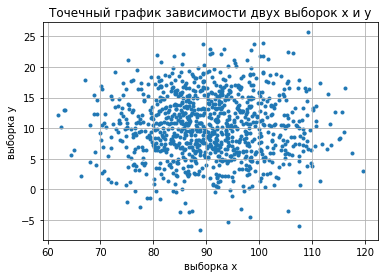

In [53]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# зададим 2 нормально распределенные случайные величины
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
# построим точечный график зависимости двух переменных

plt.xlabel('выборка x')
plt.ylabel('выборка y')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')

Частотный график выборки y  (или график плотности вероятности).

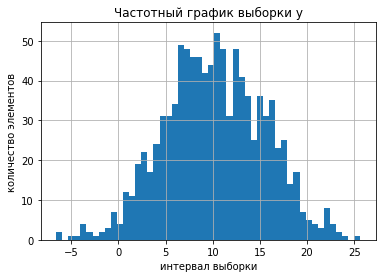

In [54]:
plt.hist(y,50)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

2-ой способ теоритической генерации нормального распределения: модуль random. 

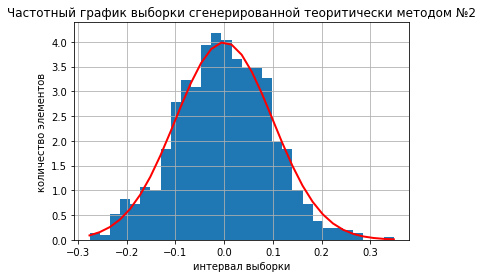

In [56]:
mu, sigma = 0, 0.1 # среднее значение и дисперсия
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), # формула распределения Гаусса
         linewidth=2, color='r')
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки сгенерированной теоритически методом №2')
plt.grid(True)
plt.show()

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [58]:
norm_rv1.pdf(3)

1.4622963575006582e-18

Построим графики функции плотности вероятности от различных выборок (с разными параметрами):

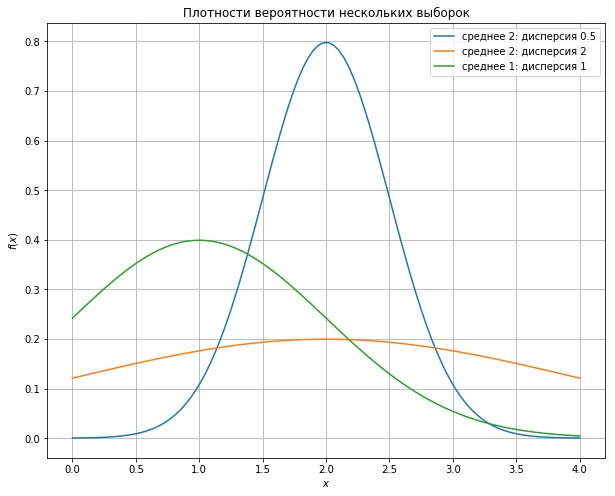

In [68]:
# зададим нормально распределенную случайную величину для нескольких выборок
norm_rv = sts.norm(loc=2, scale=0.5)
norm_rv2 = sts.norm(2, 0.1)
norm_rv3 = sts.norm(2, 2)
norm_rv4 = sts.norm(1, 1)

# зададим вектор x от 0 до 4 с шагом 100 для отрисовки результата
x = np.linspace(0,4,100) 
pdf = norm_rv.pdf(x)
pdf2 = norm_rv2.pdf(x)
pdf3 = norm_rv3.pdf(x)
pdf4 = norm_rv4.pdf(x)
plt.figure(figsize=(10,8))
plt.plot(x, pdf)
plt.plot(x, pdf3)
plt.plot(x, pdf4)

plt.legend(['среднее 2: дисперсия 0.5',  'среднее 2: дисперсия 2', 'среднее 1: дисперсия 1'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.grid(True)

# Равномерное распределение на отрезке

Равномерное распределение на практике - это числа идущие последовательно от 0 до целого числа N.

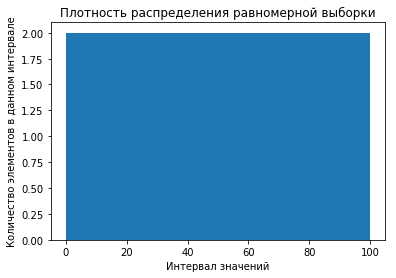

In [67]:
x = np.linspace(0, 100, 100)

plt.ylabel('Количество элементов в данном интервале')
plt.xlabel('Интервал значений')
plt.title('Плотность распределения равномерной выборки')
plt.hist(x, 50)
plt.show()

Сгенерируем теоритически выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

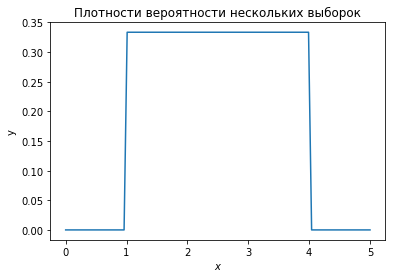

In [64]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)
# сгенерируем вектор x для отрисовки значения в pyplot.plot()
x = np.linspace(0, 5, 100)
pdf = uniform_rv.pdf(x)

plt.ylabel('y')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.plot(x, pdf)

# Центральная предельная теорема

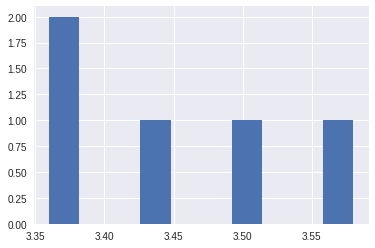

In [0]:
from numpy.random import randint

sampleMeans = []

for _ in range(5):
  # 50 элементов, значение которых от 1 до 7
    sampleMean = np.mean(randint(1, 7, 50))
    sampleMeans.append(sampleMean)

# если построим график - можно увидеть нормальное распределение
plt.hist(sampleMeans)
plt.show()

# Корелляция Пирсона

1.0


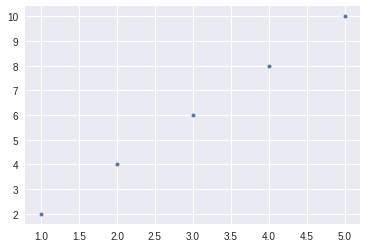

In [0]:
from scipy.stats import pearsonr
x = [1, 2, 3, 4, 5]

y = [2, 4, 6, 8, 10]
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print(corr)

# Пример корелляции

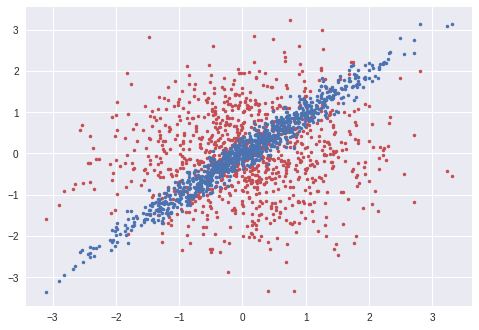

In [0]:
import numpy.linalg as la
n = 1000
C = [[1,0.98],[0.98,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

# Пример корелляции данных, загруженных с помощью pandas

Загружаем данные о ценах на авокадо в США

In [0]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

Печатаем 5 значений

In [0]:
df[:5]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Размер выборки:

In [0]:
len(df)

18249

Нормализация значений

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Total Volume', 'Total Bags']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.001026  0.000449
1  0.000877  0.000491
2  0.001890  0.000420
3  0.001262  0.000300
4  0.000815  0.000319


Корелляция скорее всего между Total Volume и Total Bags 

In [0]:
volume = df_norm[0]
bags = df_norm[1]

Посмотрим насколько они зависят друг от друга:

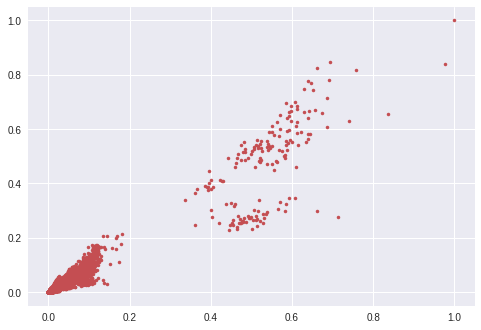

In [0]:
plt.plot(volume, bags, 'r.')

# Матрица ковариаций

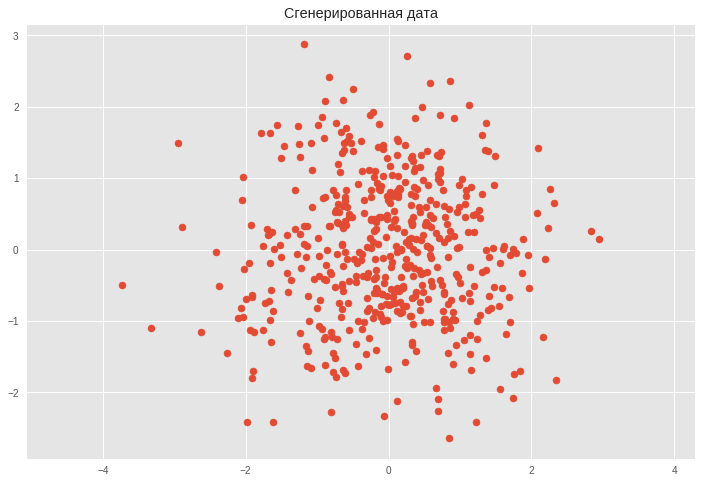

In [0]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

#  Нормальное распределение x и y со средним значением 0 и разбросом 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Сгенерированная дата')
plt.axis('equal');

Найдем матрицу ковариаций (диагональные элементы равны 1, элементы на обратной диагонали равны -1)

In [0]:
# посчитать ковариацию переменных (разброс относительно друг друга)
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# матрица ковариаций
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# считаем матрицу ковариаций для вектора X
cov_mat(X.T) # (or with np.cov(X.T))

array([[ 1.14040374, -0.03775873],
       [-0.03775873,  0.99790621]])

Изменим разброс распределений:

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[ 0.45824975,  0.05755191],
       [ 0.05755191, 12.52247263]])

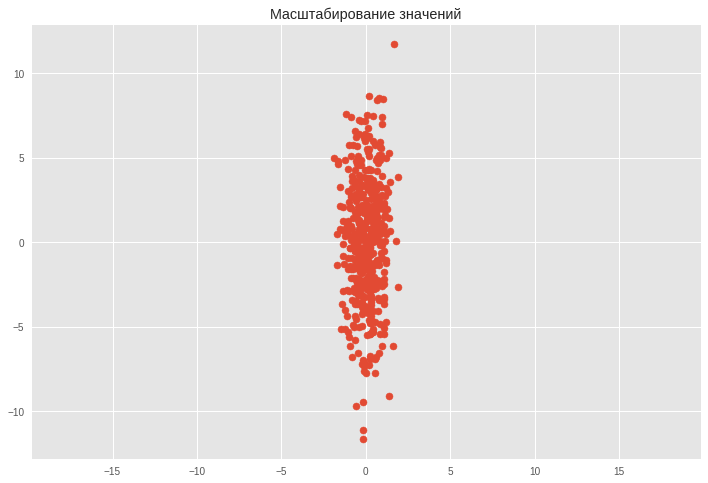

In [0]:
# центрирование переменных x, y
print(type(X))
X = X - np.mean(X, 0)

# Матрица масштабирования
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Умножаем матрицу на исходную матрицу
Y = X.dot(Scale)
print(type(Y))

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Масштабирование значений')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

Мы также можем изменить нормальное распределение с помощью повортов. 

array([[ 5.44856262, -5.45648367],
       [-5.45648367,  6.64603095]])

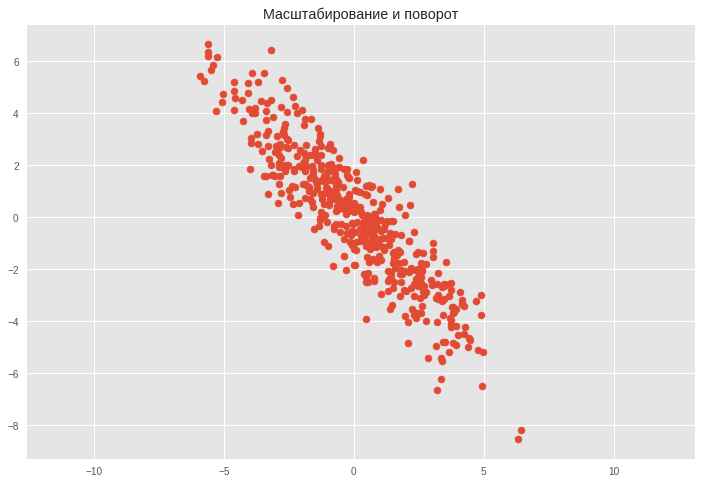

In [0]:
# масштабирование
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# повороты
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# перемножаем 2 матрицы: масштабирование и повороты
T = Scale.dot(Rot)

# перемножаем матрицу X (рандомные величины) на матрицу поворотов
Y = X.dot(T)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Масштабирование и поворот')
plt.axis('equal');

# вычисление матрицы ковариаций и вывод на экран
cov_mat(Y.T)

# Операции с матрицами. 

numpy.vstack - соединяем 2 массива вертикально;

numpy.ndarray.T - транспонирование матрицы 

In [0]:
x = np.random.normal(0, 1, 3)
y = np.random.normal(0, 1, 3)
print('x')
print(x)
print('y')
print(y)
X = np.vstack((x, y)).T
print('numpy.vstack((x,y)).T')
print(X)

x
[ 0.41467568  0.28096341 -0.56372628]
y
[-0.1275888  -0.82959378  1.27921278]
numpy.vstack((x,y)).T
[[ 0.41467568 -0.1275888 ]
 [ 0.28096341 -0.82959378]
 [-0.56372628  1.27921278]]


Перемножение матриц: numpy.ndarray.dot(A) - перемножение на матрицу A

In [0]:
x = np.random.normal(0, 1, 2)
y = np.random.normal(0, 1, 2)
X = np.vstack((x, y)).T
# Матрица масштабирования
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])
print('x: ', x)
print('y: ', y)
print('Исходные данные')
print(X)
print('Матрица масштабирования')
print(Scale)
# Умножаем исходные данные на матрицу масштабирования
Y = X.dot(Scale)
print('Результат')
print(Y)

x:  [0.00395401 0.77218354]
y:  [ 1.03493646 -1.32000986]
Исходные данные
[[ 0.00395401  1.03493646]
 [ 0.77218354 -1.32000986]]
Матрица масштабирования
[[0.7 0. ]
 [0.  3.4]]
Результат
[[ 2.76780900e-03  3.51878396e+00]
 [ 5.40528475e-01 -4.48803351e+00]]


Повороты матрицы.

In [0]:
# повороты
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# перемножаем матрицу X (рандомные величины) на матрицу поворотов
Y = X.dot(Rot)

print(X)
print(Y)

[[ 0.00395401  1.03493646]
 [ 0.77218354 -1.32000986]]
[[ 0.68144981 -0.77893213]
 [-1.4521616   0.47949987]]


Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html